# **Project: Data Exploration and NLP Modeling - traduction client reviews**
<em>By Maud Tissot & Aurélien Pouxviel</em>


# ***Summary***

#### **1. Visualization**
- 1.1 Load dataset
- 1.2 Visualization  

### **2. Data processing**
- 2.1 Collect reviews
- 2.2 Tokenize
- 2.3 Spelling correction
- 2.4 Highlighting frequent words (and n-grams)

#### **3. Summary, Translation, and Generation**
- 3.1 Sumary
- 3.2 Translation

#### **4. Sentiment Analysis**

#### **5. Topic Modeling and Lists of Topics**

#### **6. Embedding to Identify Similar Words**
- 6.1 Word2Vec Training + Glove
- 6.2 Visualization of embeddings with Matplotlib and Tensorboard
- 6.3 Implementation of Euclidean or cosine distance
- 6.4 Question answering with semantic search        

#### **7. Supervised Learning, each model well-made and well-presented**

- 7.1 TF-IDF and classical ML    
- 7.3 Model with pre-trained embeddings
- 7.4 USE (Universal Sentence Embedding) or equivalents, RNN LSTM, CNN, BERT, or other models on Hugging Face

#### **9. Creation of Streamlit applications**
- 9.2 Embeddings visualization
- 9.3 Question answering with hugging face model
- 9.4 Semantic search with cosine similarity


In [ ]:
#google collab
import shutil
from google.colab import files

#data
from collections import defaultdict
import string
import numpy as np
import os
import pandas as pd

#Vizu
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D

#token and text processing
import nltk
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

#Summary, translation and topic modelling
!pip install bertopic
import bertopic
from bertopic import BERTopic

#embedding
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import spacy
from sklearn.metrics.pairwise import cosine_similarity
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

#TFIDF et ML
from gensim.models.fasttext import FastText
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import torch
from transformers import AutoTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn import BCEWithLogitsLoss


#a ranger
import json
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from joblib import Parallel, delayed
from tqdm import tqdm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 506.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039287 sha256=ec11e7432a171d6674d47a24264adde127b6fd10a8843e762fd5f858b8ae65fe
  Stored in di

# **1. Visualization**

## **1.1 - Load dataset**

create folder 'traduction' in coa=lab, and import inside the 35 .xsls    
data : https://drive.google.com/file/d/1_kg5JzAzntzLI6eGM3_vmUSoeWk7f8ip/view

In [ ]:
#google collab
drive.mount('/content/dossiers/')
path = "/content/dossiers/MyDrive/Traduction_avis/"

df_list = []

for fichier in os.listdir(path):
    if fichier.endswith(".xlsx"):
        fichier_path = os.path.join(path, fichier)
        df_temp = pd.read_excel(fichier_path)
        df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.info()

Drive already mounted at /content/dossiers/; to attempt to forcibly remount, call drive.mount("/content/dossiers/", force_remount=True).
(34435, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   note              24104 non-null  float64
 1   auteur            34434 non-null  object 
 2   avis              34435 non-null  object 
 3   assureur          34435 non-null  object 
 4   produit           34435 non-null  object 
 5   type              34435 non-null  object 
 6   date_publication  34435 non-null  object 
 7   date_exp          34435 non-null  object 
 8   avis_en           34434 non-null  object 
 9   avis_cor          435 non-null    object 
 10  avis_cor_en       431 non-null    object 
dtypes: float64(1), object(10)
memory usage: 2.9+ MB


- note : La note attribuée, représentée en tant que valeur flottante.   
- auteur : Le nom de l'auteur de l'avis.   
- avis : Le texte de l'avis en français.    
- assureur : Le nom de l'assureur.    
- produit : Le nom du produit d'assurance.   
- type : Le type si train ou test.    
- date_publication : La date de publication de l'avis.    
- date_exp : La date d'expiration de l'assurance.    
- avis_en : La traduction anglaise de l'avis.    
- avis_cor : L'avis corrigé en français.    
- avis_cor_en : La traduction anglaise de l'avis corrigé.    

In [ ]:
df.head(3)

note            auteur                                               avis  \
0   NaN  catalane66-77373  Assurance qui met les clients en difficultés. ...   
1   NaN  egletons19-49616  Bonjour\nAdhérent 3001628. Vous m'avez adressé...   
2   NaN         luc-71731  Je suis toujours en attente de mon complément ...   

    assureur     produit  type date_publication    date_exp  \
0  Intériale  prevoyance  test       05/07/2019  01/07/2019   
1  Intériale  prevoyance  test       27/03/2019  01/03/2019   
2  Intériale  prevoyance  test       28/02/2019  01/02/2019   

                                             avis_en  \
0  Insurance that puts customers in difficulty. S...   
1  Hello\nMember 3001628. You have sent me a medi...   
2  I am still waiting for my salary supplement fo...   

                                            avis_cor  \
0  Assurance qui met les clients en difficultés. ...   
1  Bonjour\nAdhérent 3001628. Vous m'avez adressé...   
2  Je suis toujours en attente de mon complément ...   

                                         avis_cor_en  
0  Insurance that puts customers in difficulty. S...  
1  Hello\nMember 3001628. You have sent me a medi...  
2  I am still waiting for my salary supplement fo...

In [ ]:
df.isnull().sum()

note                10331
auteur                  1
avis                    0
assureur                0
produit                 0
type                    0
date_publication        0
date_exp                0
avis_en                 1
avis_cor            34000
avis_cor_en         34004
dtype: int64

## **1.2 - Visualization**


The interest of the dataset is that it's already split into a train and test set. As we can see on the graph below, they are no values for the grade for the test set.

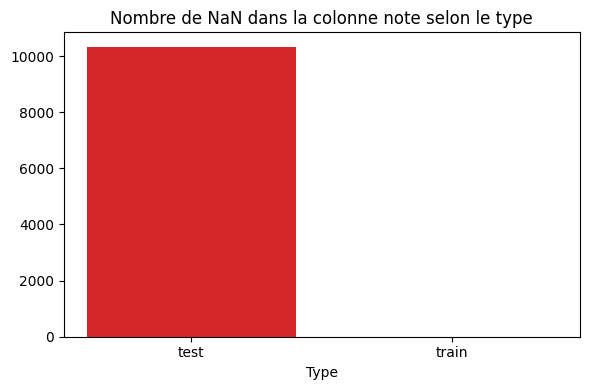

In [ ]:
nan_counts = df.groupby('type')['note'].apply(lambda x: x.isna().sum()).reset_index()

plt.figure(figsize=(6, 4))
plt.bar(nan_counts['type'], nan_counts['note'],color="tab:red")
plt.xlabel('Type')
plt.title('Nombre de NaN dans la colonne note selon le type')
plt.tight_layout()
plt.show()

In [ ]:
df["date_exp"] = pd.to_datetime(df["date_exp"],format='%d/%m/%Y')
df["date_publication"] = pd.to_datetime(df["date_publication"],format='%d/%m/%Y')
#df["date_publication"] = pd.to_datetime(df["date_publication"])

train_df = df[df["type"]=="train"]
test_df  = df[df["type"]=="test"]

train_df["date_exp"] = train_df["date_exp"].dt.strftime('%Y-%m-%d')
test_df["date_exp"] = test_df["date_exp"].dt.strftime('%Y-%m-%d')

The interest of the dataset is that it's already split into a train and test set. As we can see on the graph below, they are no values for the grade for the test set.

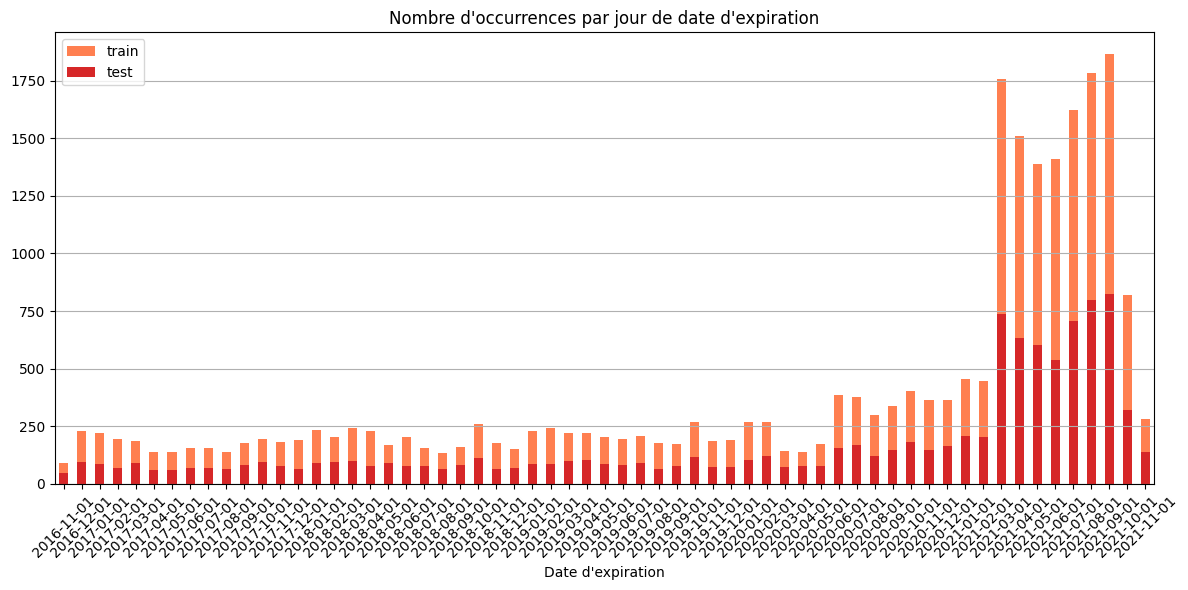

In [ ]:
train_count = train_df.groupby(df["date_exp"].dt.date)["date_exp"].count()
test_count  = test_df.groupby(df["date_exp"].dt.date)["date_exp"].count()

plt.figure(figsize=(12, 6))

train_count.plot(kind="bar",label="train",color="coral")
test_count.plot(kind="bar",label="test",color="tab:red")
plt.legend()
plt.xlabel("Date d'expiration")
plt.title("Nombre d'occurrences par jour de date d'expiration")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Observons la repartition des notes dans le dataset***

In [ ]:
note_counts

2    2
3    6
4    7
5    5
Name: note, dtype: int64

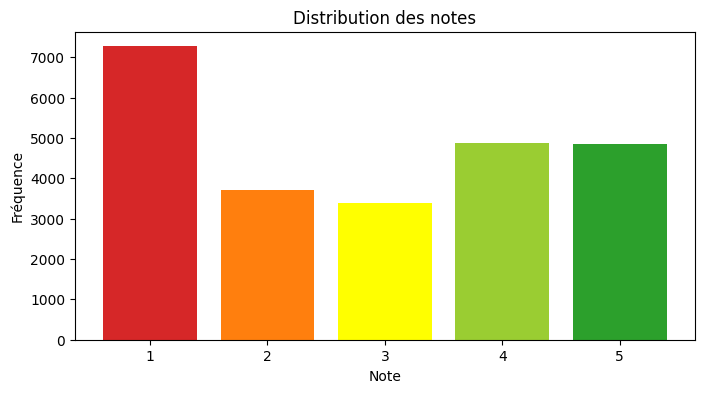

In [ ]:
note_counts = train_df['note'].value_counts().sort_index()
colors = ["tab:red", "tab:orange", "yellow", "yellowgreen", "tab:green"]

plt.figure(figsize=(8, 4))
plt.bar(note_counts.index, note_counts.values, color=colors)
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.xticks(note_counts.index)
plt.show()

<ipython-input-82-7c4551298b50>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn', len(np.unique(train_df["produit"])))


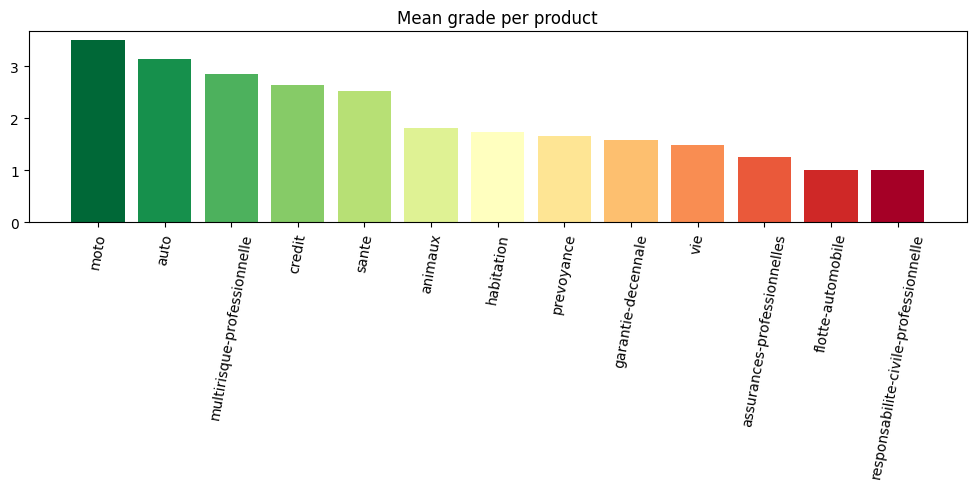

In [ ]:
note_prod = train_df.groupby('produit').mean().sort_values(by="note",ascending=False)

colormap = plt.cm.get_cmap('RdYlGn', len(np.unique(train_df["produit"])))

plt.figure(figsize=(10, 5))
plt.bar(note_prod.index,note_prod["note"],color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(train_df["produit"])))[::-1]])
plt.title('Mean grade per product')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

For the most rated insurances, we observed the evolution of the average grade from 2016 to nowdays. APRIL and Direct assurance seems to have the best evolution, whereas the others doesn't show a visible tendency

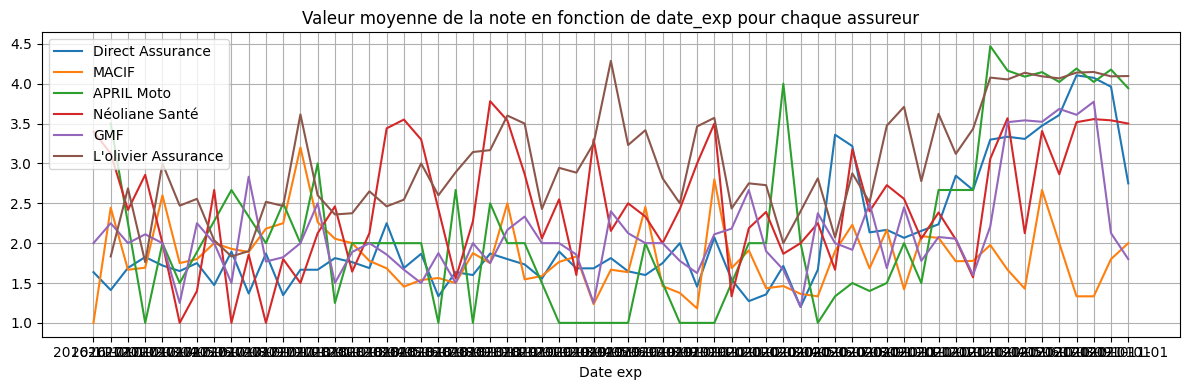

In [ ]:
plt.figure(figsize=(12, 4))

for assureur in train_df['assureur'].unique()[:]:
    df_assureur = train_df[train_df['assureur'] == assureur]
    if np.shape(df_assureur)[0]>800:
      moyenne_note = df_assureur.groupby(df_assureur["date_exp"])['note'].mean()
      plt.plot(moyenne_note.index, moyenne_note.values,label=assureur)

plt.xlabel('Date exp')
plt.title('Valeur moyenne de la note en fonction de date_exp pour chaque assureur')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now we can see that the best insurances for the users are not obviously the most popular (Zen'Up, Mapa) but still, APRIL and Direct assurance are located in the best insurances

<ipython-input-86-7253c1abfedc>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn', len(np.unique(train_df["assureur"])))


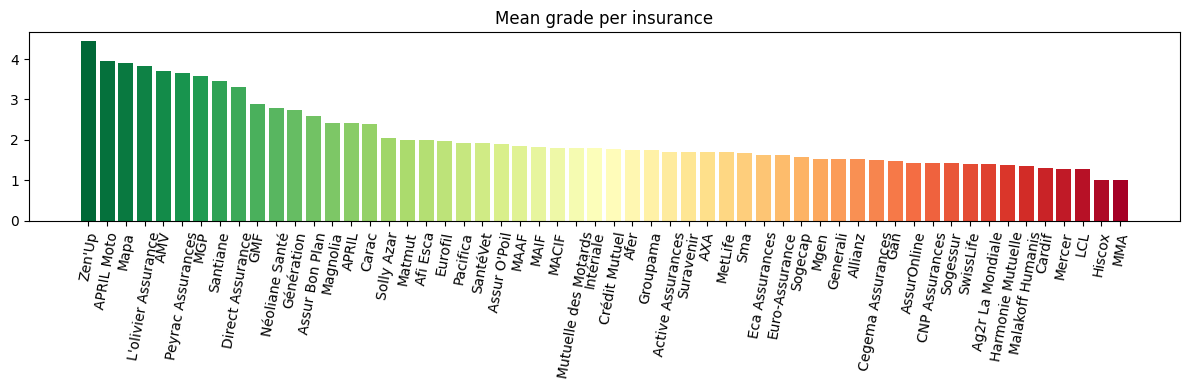

In [ ]:
note_prod = train_df.groupby('assureur').mean().sort_values(by="note",ascending=False)

colormap = plt.cm.get_cmap('RdYlGn', len(np.unique(train_df["assureur"])))

plt.figure(figsize=(12, 4))
plt.bar(note_prod.index,note_prod["note"],color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(train_df["assureur"])))[::-1]])
plt.title('Mean grade per insurance')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

<ipython-input-75-e45e78a57bbb>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(train_df["assureur"])))


<Figure size 1200x400 with 0 Axes>

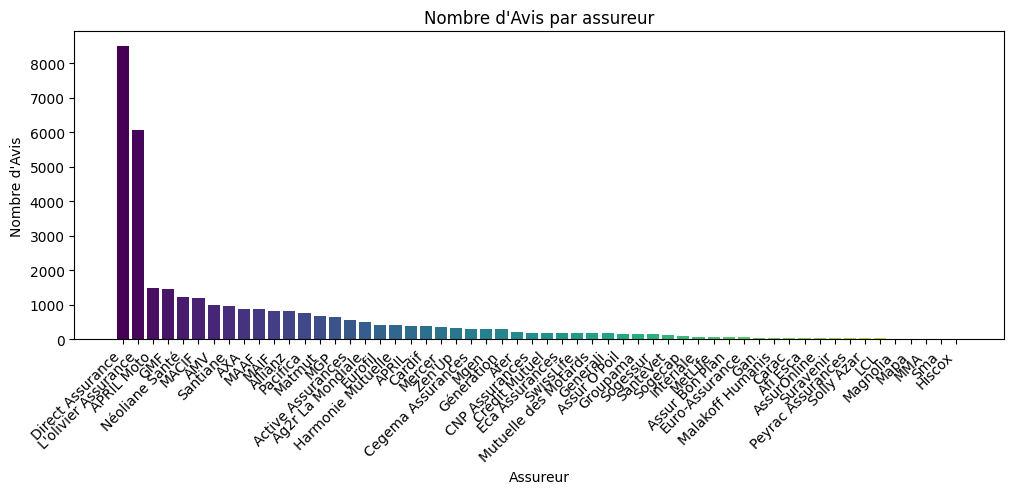

In [ ]:
plt.figure(figsize=(12, 4))
count_data = df['assureur'].value_counts()
colormap = plt.cm.get_cmap('viridis', len(np.unique(train_df["assureur"])))

plt.figure(figsize=(12, 4))
plt.bar(count_data.index, count_data.values,color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(train_df["assureur"])))])
plt.title('Nombre d\'Avis par assureur')
plt.xlabel('Assureur')
plt.ylabel('Nombre d\'Avis')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-74-78b27aa50e71>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(train_df["produit"])))


<Figure size 1200x400 with 0 Axes>

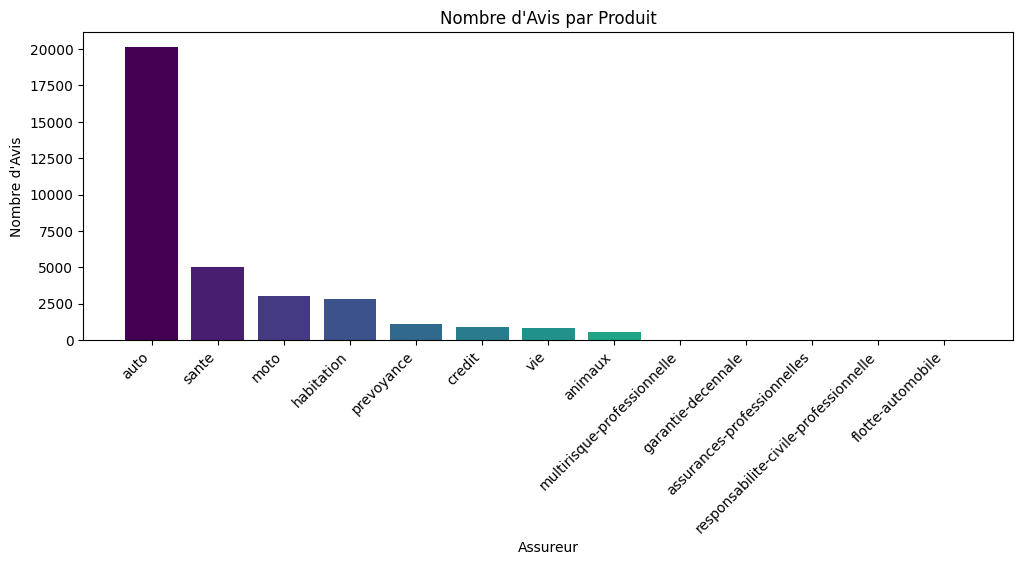

In [ ]:
plt.figure(figsize=(12, 4))
count_data = df['produit'].value_counts()
colormap = plt.cm.get_cmap('viridis', len(np.unique(train_df["produit"])))

plt.figure(figsize=(12, 4))
plt.bar(count_data.index, count_data.values,color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(train_df["produit"])))])
plt.title('Nombre d\'Avis par Produit')
plt.xlabel('Assureur')
plt.ylabel('Nombre d\'Avis')
plt.xticks(rotation=45, ha='right')
plt.show()

***Observons des avis dans le dataset***

The cloud shows data need to be process before using comments.

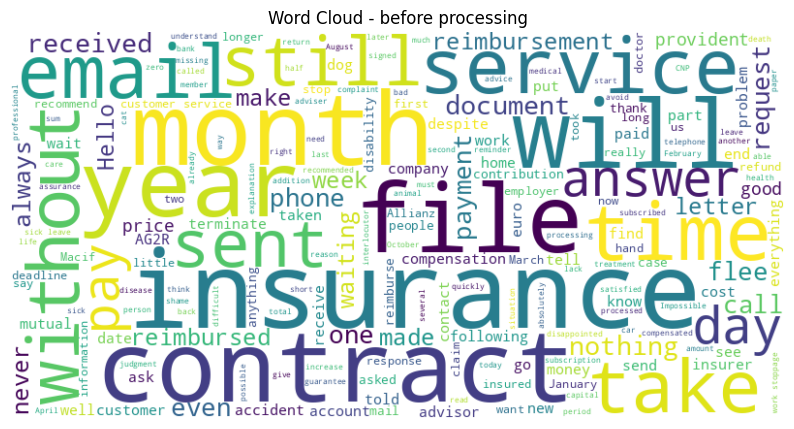

In [ ]:
texte_avis = ' '.join(df['avis_en'].iloc[0:500].dropna())

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110,background_color="white").generate(texte_avis)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud - before processing')
plt.show()

# **2. Data processing**



## **2.1 - Collect reviews**

In [ ]:
reviews_en = list(df["avis_en"].values)#list(df.dropna(subset=['avis_en'])["avis_en"].values)
reviews_fr = list(df["avis"].values)#list(df.dropna(subset=['avis'])["avis"].values)

ex = reviews_en[150]
ex

'No problem selling contracts but no follow -up during telephone calls they answer what we want to hear but no action behind impossible to be valid codes to create your space and be able to manage on your own since customer service is incompetent'

In [ ]:
nanVal = [i for i, value in enumerate(reviews_en) if not isinstance(value, str)]
for i in nanVal:
  reviews_en[i]="None"

df.iloc[i, df.columns.get_loc("avis_en")] = "None"
df.iloc[i, df.columns.get_loc("avis_en")]

'None'

## **2.2 - tokenize**

In [ ]:
def tokenizeDoc(text,delWords=[],lem=False,link=True,langage="en"):
  if langage == "en":
    stopword = stopwords.words('english')
  if langage == "fr":
    stopword = stopwords.words('french')
  token = word_tokenize(text.lower())
  token = [word for word in token if word not in stopword and len(word)>2]
  if link:
    token = [word for word in token if not any(char in word for char in [".", "-", "/","\\n","@","html","<",">"])] #delete link and adresse
  if lem:
    lemmatizer = WordNetLemmatizer()
    token = [lemmatizer.lemmatize(word) for word in token]
  return token

def toSentence(token):
  return " ".join(token)

In [ ]:
print("Nb of words        :",len(ex.split(" ")))
print("Basics processings :",len(tokenizeDoc(ex,link=False,lem=False)))
print("Lemmatize          :",len(tokenizeDoc(ex,link=False,lem=True)))
print("Delete other cara  :",len(tokenizeDoc(ex,link=True,lem=False)))
print("Final processing   :",len(tokenizeDoc(ex,link=True,lem=True)))
print(tokenizeDoc(ex,link=True,lem=True))

Nb of words        : 44
Basics processings : 23
Lemmatize          : 23
Delete other cara  : 22
Final processing   : 22
['problem', 'selling', 'contract', 'follow', 'telephone', 'call', 'answer', 'want', 'hear', 'action', 'behind', 'impossible', 'valid', 'code', 'create', 'space', 'able', 'manage', 'since', 'customer', 'service', 'incompetent']


## **2.3 - Spelling correction**

Il vaut mieux corriger le texte avant d'appliquer un traitement, si le texte contient des fautes de frappe. Surtout dans le cas d'avis public.On fait un processing leger en anglais avant d'appliquer le correcteur. (Qui n'est pas applicable au francais). Pour corriger 30000 avis il faut environ 3/4heures

In [ ]:
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

reviews_process_en = [toSentence(tokenizeDoc(r,link=True,lem=False)) for r in reviews_en]
ex = reviews_process_en[0]
print("exemple    :",ex)
print("correction :",correct_spelling(ex))

reviews_correct_en = [correct_spelling(r) for r in reviews_process_en[:500]]

exemple    : insurance puts customers difficulty several weeks waiting payment linked salary maintenance contract still nothing accused receipt complaint still payments good put people financial difficulties answer wait apart bank wait
correction : insurance puts customers difficulty several weeks waiting payment linked salary maintenance contract still nothing accused receipt complaint still payments good put people financial difficulties answer wait apart bank wait


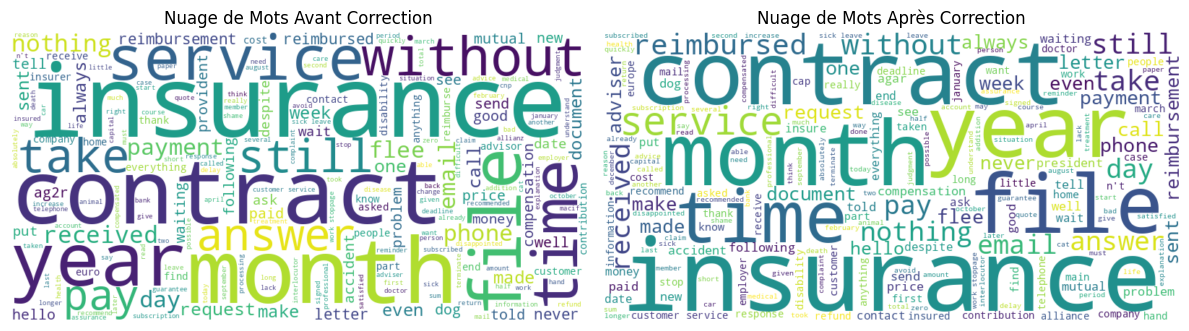

In [ ]:
wordcloud_process   = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews_process_en[0:500]))
wordcloud_corrected = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews_correct_en[0:500]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_process, interpolation='bilinear')
plt.title('Nuage de Mots Avant Correction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_corrected, interpolation='bilinear')
plt.title('Nuage de Mots Après Correction')
plt.axis('off')

plt.tight_layout()
plt.show()

## **2.4 - Highlighting frequent words**

Maintenant qu'on a corrigé la version anglais on applique aussi un traitement sur les caractères speciaux et on lemmatise nos données. Comme la correction prend du temps on a choisi pour l'instant de continuer avec un texte lemmatise

In [ ]:
reviews_process_fr = [toSentence(tokenizeDoc(r,link=True,lem=True,langage="fr")) for r in reviews_fr]
reviews_process_en = [toSentence(tokenizeDoc(r,link=True,lem=True)) for r in reviews_en] # ou review corrected

(-0.5, 799.5, 399.5, -0.5)

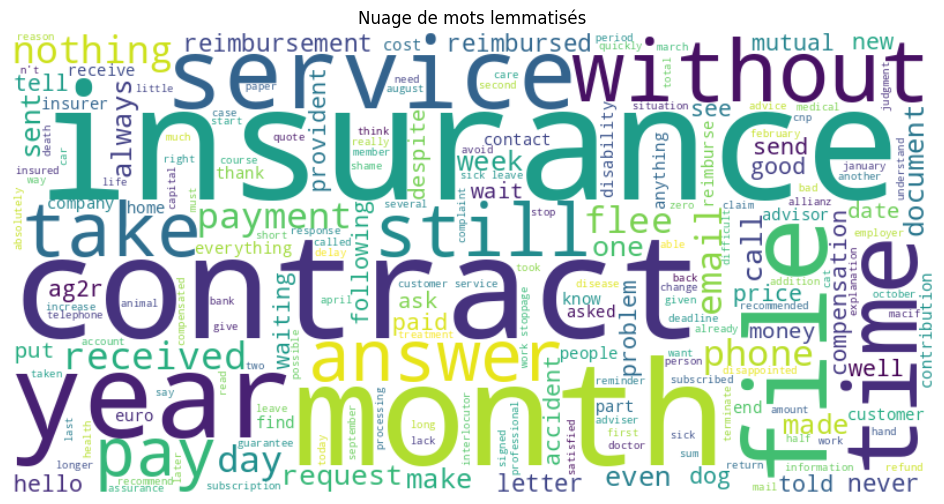

In [ ]:
wordcloud_corrected = WordCloud(width=800, height=400, background_color='white').generate(' '.join(reviews_process_en[0:500]))

plt.figure(figsize=(16, 6))

plt.imshow(wordcloud_process, interpolation='bilinear')
plt.title('Nuage de mots lemmatisés')
plt.axis('off')

<ipython-input-38-b3163309e03f>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(ngram_df["ngram"])))


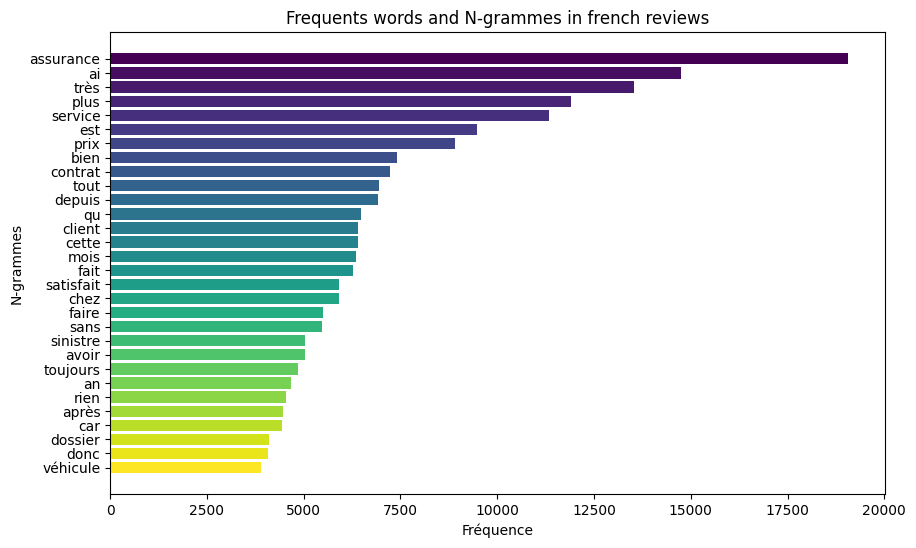

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30)

X = vectorizer.fit_transform(reviews_process_fr)
ngram_df = pd.DataFrame({'ngram': vectorizer.get_feature_names_out(),'count': X.sum(axis=0).A1})
ngram_df = ngram_df.sort_values(by='count', ascending=False)

colormap = plt.cm.get_cmap('viridis', len(np.unique(ngram_df["ngram"])))

plt.figure(figsize=(10, 6))
plt.barh(ngram_df['ngram'], ngram_df['count'],color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(ngram_df["ngram"])))])
plt.xlabel('Fréquence')
plt.ylabel('N-grammes')
plt.title('Frequents words and N-grammes in french reviews')
plt.gca().invert_yaxis()
plt.show()

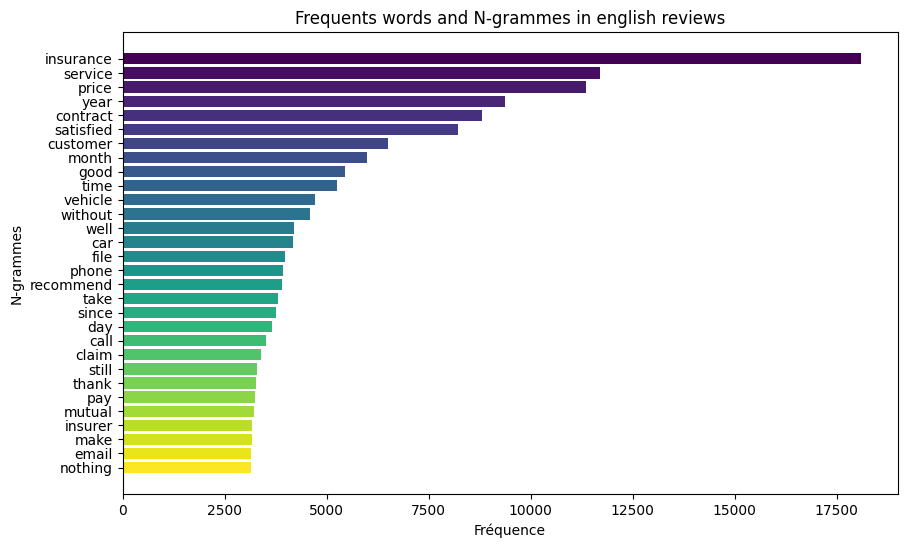

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30)

X = vectorizer.fit_transform(reviews_process_en)
ngram_df = pd.DataFrame({'ngram': vectorizer.get_feature_names_out(),'count': X.sum(axis=0).A1})
ngram_df = ngram_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ngram_df['ngram'], ngram_df['count'],color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(ngram_df["ngram"])))])
plt.xlabel('Fréquence')
plt.ylabel('N-grammes')
plt.title('Frequents words and N-grammes in english reviews')
plt.gca().invert_yaxis()
plt.show()

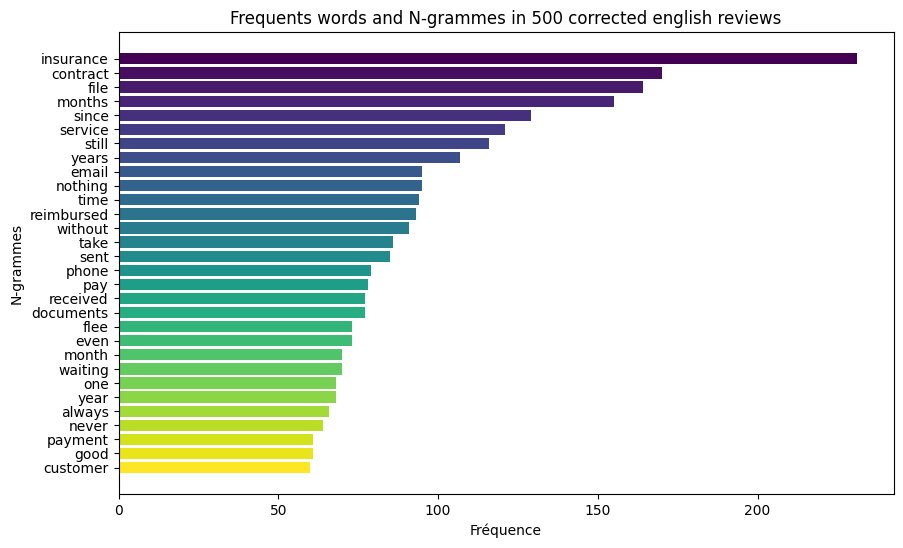

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=30)

X = vectorizer.fit_transform(reviews_correct_en)
ngram_df = pd.DataFrame({'ngram': vectorizer.get_feature_names_out(),'count': X.sum(axis=0).A1})
ngram_df = ngram_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ngram_df['ngram'], ngram_df['count'],color=[colormap(i) for i in np.linspace(0, 1, len(np.unique(ngram_df["ngram"])))])
plt.xlabel('Fréquence')
plt.ylabel('N-grammes')
plt.title('Frequents words and N-grammes in 500 corrected english reviews')
plt.gca().invert_yaxis()
plt.show()

- On remarque que la gestion du texte est bien plus puissant avec nltk pour le vocabulaire anglais. Il semble que les mots les plus fréquents et pertinents tels que service, prix soit directement indiqués en anglais. Alors qu'en francais il y a plus de bruit venant de mots tel que "qu", "ai" ...

- Bien qu'on ait corrigé seulement 500 reviews on observe quelques differences et similarités

In [ ]:
df["avis_process_en"] = reviews_process_en
df["avis_process_fr"] = reviews_process_fr
print(df.info())
df.to_csv('/content/dossiers/MyDrive/avis_process.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   note              24104 non-null  float64       
 1   auteur            34434 non-null  object        
 2   avis              34435 non-null  object        
 3   assureur          34435 non-null  object        
 4   produit           34435 non-null  object        
 5   type              34435 non-null  object        
 6   date_publication  34435 non-null  datetime64[ns]
 7   date_exp          34435 non-null  datetime64[ns]
 8   avis_en           34435 non-null  object        
 9   avis_cor          435 non-null    object        
 10  avis_cor_en       431 non-null    object        
 11  avis_process_en   34435 non-null  object        
 12  avis_process_fr   34435 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(10)
memory usage: 3.4+ MB
None


In [ ]:
df = pd.read_csv('/content/dossiers/MyDrive/avis_process.csv')
train_df = df[df["type"]=="train"]
test_df  = df[df["type"]=="test"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   note              24104 non-null  float64
 1   auteur            34434 non-null  object 
 2   avis              34435 non-null  object 
 3   assureur          34435 non-null  object 
 4   produit           34435 non-null  object 
 5   type              34435 non-null  object 
 6   date_publication  34435 non-null  object 
 7   date_exp          34435 non-null  object 
 8   avis_en           34435 non-null  object 
 9   avis_cor          435 non-null    object 
 10  avis_cor_en       431 non-null    object 
 11  avis_process_en   34431 non-null  object 
 12  avis_process_fr   34434 non-null  object 
dtypes: float64(1), object(12)
memory usage: 3.4+ MB


# **3. Summary, Translation, and Generation**

## **3.1 - Summary with t5**

On fait un resumé par assurance de la pire à la meilleur, pour une selection de 5assurance
- LCL: la moins bien notée _ autour de 1/5
- Euro-Assurance :autour de 2/5
- Matmut autour de 3/5
- Génération autour de 4/5
- Zen'Up : plus de 4/5

On va regarder si le resumé des 100 premiers mots de chaque commentaire nous donne un indice sur la note       
T5 = text-to-Text Transfer Transformer, is a Transformer based architecture that uses a text-to-text approach

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
np.unique(train_df["assureur"])

array(['AMV', 'APRIL', 'APRIL Moto', 'AXA', 'Active Assurances', 'Afer',
       'Afi Esca', 'Ag2r La Mondiale', 'Allianz', 'Assur Bon Plan',
       "Assur O'Poil", 'AssurOnline', 'CNP Assurances', 'Carac', 'Cardif',
       'Cegema Assurances', 'Crédit Mutuel', 'Direct Assurance',
       'Eca Assurances', 'Euro-Assurance', 'Eurofil', 'GMF', 'Gan',
       'Generali', 'Groupama', 'Génération', 'Harmonie Mutuelle',
       'Hiscox', 'Intériale', "L'olivier Assurance", 'LCL', 'MAAF',
       'MACIF', 'MAIF', 'MGP', 'MMA', 'Magnolia', 'Malakoff Humanis',
       'Mapa', 'Matmut', 'Mercer', 'MetLife', 'Mgen',
       'Mutuelle des Motards', 'Néoliane Santé', 'Pacifica',
       'Peyrac Assurances', 'Santiane', 'SantéVet', 'Sma', 'Sogecap',
       'Sogessur', 'Solly Azar', 'Suravenir', 'SwissLife', "Zen'Up"],
      dtype=object)

In [ ]:
from sklearn.utils import shuffle
train_df = shuffle(train_df)

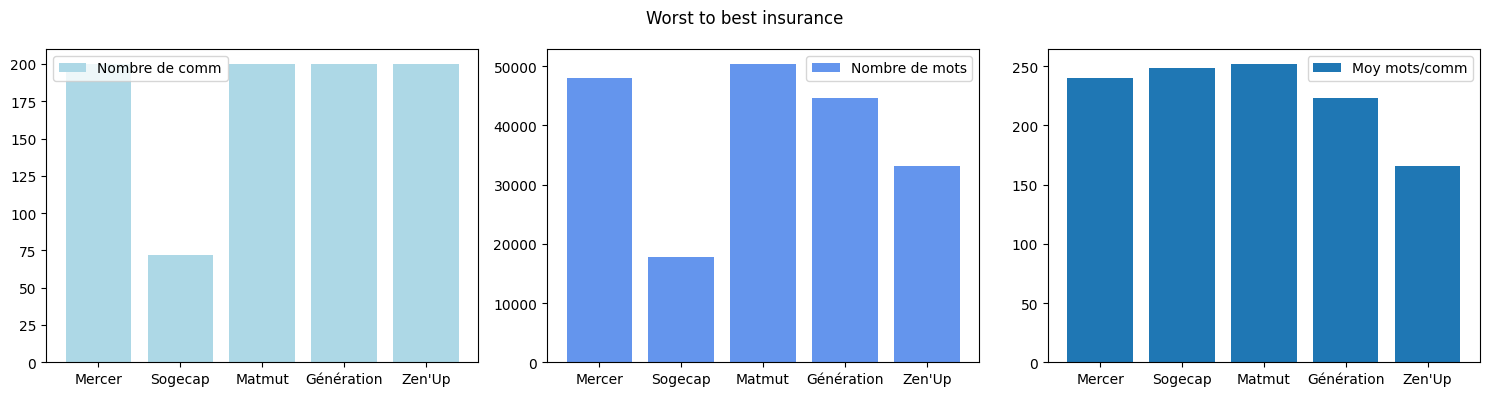

In [ ]:
#We don't use the processed data for summarization
mer = list(train_df[train_df["assureur"]=="Mercer"]["avis_en"].values)[:200]              #Worst score around 1
sog = list(train_df[train_df["assureur"]=="Sogecap"]["avis_en"].values)[:200]             #second worst around 2.5
mat = list(train_df[train_df["assureur"]=="Matmut"]["avis_en"].values)[:200]              #average score 2 to 3
gen = list(train_df[train_df["assureur"]=="Génération"]["avis_en"].values)[:200]         # Second best score 3to 4
zen = list(train_df[train_df["assureur"]=="Zen'Up"]["avis_en"].values)[:200]              #Best score 4 to 5

names=["Mercer","Sogecap","Matmut","Génération","Zen'Up"]
reviews_by_ass = [mer,sog,mat,gen,zen]
reviews_by_ass = [[r[:300] for r in review] for review in reviews_by_ass]
reviews_by_cat = [" ".join(r) for r in reviews_by_ass]
mean = [len(r)/len(comm) for r,comm in zip(reviews_by_cat,reviews_by_ass)]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].bar(names, [len(r) for r in reviews_by_ass], label="Nombre de comm",color="lightblue")
axes[0].legend()

axes[1].bar(names, [len(r) for r in reviews_by_cat], label="Nombre de mots",color="cornflowerblue")
axes[1].legend()

axes[2].bar(names,mean, label="Moy mots/comm",color="tab:blue")
axes[2].legend()

plt.suptitle("Worst to best insurance")
plt.tight_layout()
plt.show()

In [ ]:
summaries = []
for i in range(len(reviews_by_cat)):
    inputs = tokenizer.encode("summarize: " + reviews_by_cat[i],
                              return_tensors = "pt",
                              max_length     = 1000,
                              truncation     = True)
    outputs = model.generate(inputs,
                           max_length     = 512,
                           min_length     = 100,
                           length_penalty = 2.0,
                           num_beams      = 4,
                           early_stopping = True)
    summaries.append(tokenizer.decode(outputs[0]))

In [ ]:
for name,summ in zip(names,summaries):
    print(f"{name} : {summ}")
    print()

Mercer : <pad> Mercer (business mutual) does not manage the files of its customers. it's been 2 months since i await the validation of the portability of my mutual while the documents have been shipped more than 2 times. i have to call at least 30 times to perceive my reimbursement is lamentable. no follow -up, no alert, just a deposit message. the display of services that are in problem is hidden after 3 "actions'</s>

Sogecap : <pad> cnn's john sutter says the company is incompetent and deplorable. sutter: "zero, zero, incompetent, deplorable service, reimbursement delay incompatible with human problems in the face of diseases, signature at the bottom of people who do not even exist" "i am the benefit of a life insurance contract due to my aunt who died in September 2020. sutter: "i am the benefit of a life insurance contract due to my aunt</s>

Matmut : <pad> matmut is clearly not a friend, says adam mcdonald. mcdonald: "it is in adversity that we recognize his real friends" mcdonal

In [ ]:
#si on applique le correcteur sur tout on enregistre
with open('resumes_avis_assurance.txt', 'w') as file:
    for review in summaries:
        file.write(review + '\n')

## **3.2 - Translation**

In [ ]:
translations = []
for i in range(len(summaries)):
    inputs = tokenizer.encode("translate English to French: " + summaries[i],
                              return_tensors = "pt",
                              max_length     = len(summaries[i].split(" ")),
                              truncation     = True)
    outputs = model.generate(inputs,
                             length_penalty = 2.0,
                             num_beams      = 4,
                             early_stopping = True)
    translations.append(tokenizer.decode(outputs[0]))

In [ ]:
for name,trans in zip(names,translations):
    print(f"{name} : {trans}")
    print()

Mercer : <pad> Mercer (mutuelle d'affaires) ne gère pas les dossiers de ses clients. il y a 2 mois que j'attends la validation de la transférabilité de ma mutuelle alors que les documents ont été expédiés plus de 2 fois. je dois appeler au moins 30 fois pour comprendre que mon remboursement est lamentable. pas de suivi, pas d'alerte, simplement un message de dépôt. l'affichage des</s>

Sogecap : <pad> cnn's john sutter dit que l'entreprise est incompétente et déplorable. sutter : « zéro, zéro, incompétent, déplorable service, retard de remboursement incompatible avec les problèmes humains face aux maladies, signature au bas des gens qui n'existent même pas » « je bénéficie d'un contrat d'assurance-vie à cause de ma tante qui est décédée </s>

Matmut : <pad> matmut n’est manifestement pas un ami, dit adam mcdonald. mcdonald : « C’est dans l’adversité que nous reconnaissons ses vrais amis » mcdonald : « le matmut, une entreprise comme aucune autre, n’est manifestement pas un ami » mcdona

In [ ]:
#si on applique le correcteur sur tout on enregistre
with open('traduction_resumés.txt', 'w') as file:
    for review in translations:
        file.write(review + '\n')

# **4. Sentiment Analysis on reviews**

--- Model from Hugging Face : "juliensimon/reviews-sentiment-analysis"
Distilbert modèle fine-tuned sur des revues de produits en langue anglaise : Bons résultats sur nos données car les revues de produits sont similaires aux revues d'assurance. Comme le modèle est pré-entraîné en anglais, nous allons l'appliquer sur les avis en anglais.

On choisit donc de l'appliquer sur les 100 premiers avis pour Generali et Zen'Up dont les notes sont respectivement autour de 1.5 et 4.5.

Notre objectif et de verifier que la note est corrélé au sentiment d'un commentaire  

In [ ]:
df.head(2)
df.shape

(34435, 13)

In [ ]:
model_name = "juliensimon/reviews-sentiment-analysis"
#model_name = "siebert/sentiment-roberta-large-english"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

max = 512
def analyze_sentiment(comment):
    truncated_comment = comment[:512]  #max seq lenght
    sentiment = sentiment_analyzer(truncated_comment)
    return sentiment[0]


def process_comments_parallel(comments):
    return Parallel(n_jobs=-1, prefer="threads")(delayed(analyze_sentiment)(comment) for comment in tqdm(comments))


df_generali = df[df['assureur'] == 'Generali'].head(100)
print(df_generali.shape)

df_zenup = df[df['assureur'] == "Zen'Up"].head(100)
print(df_zenup.shape)

df_sentiment = pd.concat([df_generali, df_zenup])
df_sentiment['sentiment_ENG'] = process_comments_parallel(df_sentiment['avis_process_en'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

(100, 13)
(100, 13)


100%|██████████| 200/200 [00:25<00:00,  7.97it/s]


In [ ]:
def map_sentiment_label(label):
    if label == 'LABEL_0':
        return 'négatif'
    elif label == 'LABEL_1':
        return 'positif'
    else:
        return 'inconnu'

df_sentiment['Truesentiment'] = df_sentiment['sentiment_ENG'].apply(lambda result: map_sentiment_label(result['label']))
df_sentiment.head(4)

note         auteur                                               avis  \
26   NaN  dede60-115455  Mon père est décédé voila 4 semaines (05/05/20...   
27   NaN    marc-114207  J'ai ouvert un contrat Generali protection de ...   
28   NaN    gh59-103164  En cas de conflits ça fonctionne service de la...   
29   NaN    coco-101309  A fuire j'ai été en arrêt cas contact  covid 2...   

    assureur     produit  type date_publication   date_exp  \
26  Generali  prevoyance  test       2021-05-31 2021-05-01   
27  Generali  prevoyance  test       2021-05-19 2021-05-01   
28  Generali  prevoyance  test       2021-01-24 2021-01-01   
29  Generali  prevoyance  test       2020-12-11 2020-12-01   

                                              avis_en  \
26  My father died 4 weeks ago (05/05/2021), we im...   
27  I opened a general life protection contract. I...   
28  In case of conflicts it works service of the a...   
29  Flery I was stopped in case COVID 2 -week cont...   

                                             avis_cor  \
26  Mon père est décédé voila 4 semaines (05/05/20...   
27  J'ai ouvert un contrat Generali protection de ...   
28  En cas de conflits ça fonctionne service de la...   
29  A fuir j'ai été en arrêt cas contact  covid 2 ...   

                                          avis_cor_en  \
26  My father died 4 weeks ago (05/05/2021), we im...   
27  I opened a general life protection contract. I...   
28  In case of conflicts it works service of the a...   
29  To flee I was stopped in case of contact COVVI...   

                                      avis_process_en  \
26  father died week ago immediately warned insure...   
27  opened general life protection contract view s...   
28  case conflict work service assurance insurance...   
29  flery stopped case covid contact week extensio...   

                                      avis_process_fr  \
26  père décédé voila semaines immédiatement préve...   
27  j'ai ouvert contrat generali protection vie fr...   
28  ca conflits fonctionne service mediation assur...   
29  fuire j'ai arrêt ca contact covid semaines plu...   

                                        sentiment_ENG Truesentiment  
26  {'label': 'LABEL_0', 'score': 0.9579296112060547}       négatif  
27  {'label': 'LABEL_0', 'score': 0.9033868312835693}       négatif  
28  {'label': 'LABEL_0', 'score': 0.7882546782493591}       négatif  
29  {'label': 'LABEL_0', 'score': 0.9366939663887024}       négatif

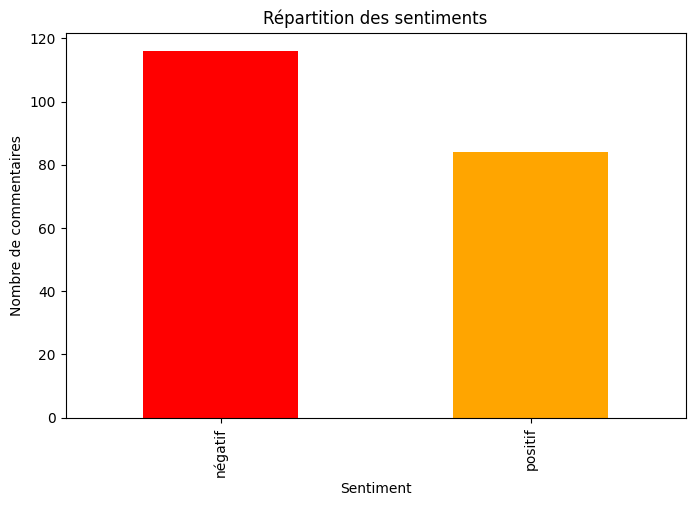

négatif    116
positif     84
Name: Truesentiment, dtype: int64


In [ ]:
# Visualisation de la répartition des sentiments
plt.figure(figsize=(8, 5))
df_sentiment['Truesentiment'].value_counts().plot(kind='bar', color=['red', 'orange'])
plt.title('Répartition des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
plt.show()
print(df_sentiment['Truesentiment'].value_counts())


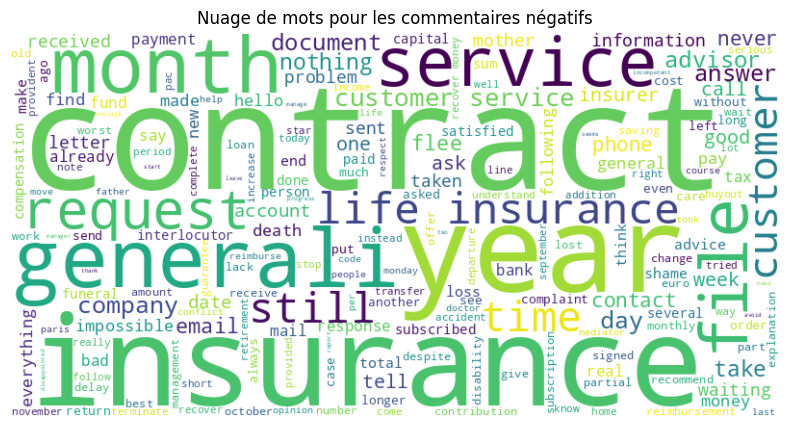

In [ ]:
negative_comments = ' '.join(df_sentiment[df_sentiment['Truesentiment'] == 'négatif']['avis_process_en'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les commentaires négatifs')
plt.show()

on retrouve des mots tel que impossible, worst, wait, long, problem, bad

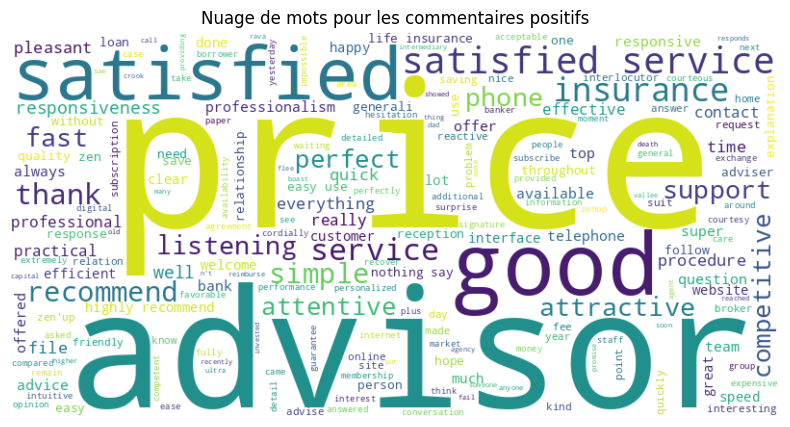

In [ ]:
positive_comments = ' '.join(df_sentiment[df_sentiment['Truesentiment'] == 'positif']['avis_process_en'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les commentaires positifs')
plt.show()

###  Dans le nuage positif : satisfied, recommend, professional, good, thank, efficient. Le vocabulaire semble beaucoup plus marqué

In [ ]:
datasent = df_sentiment[['assureur', 'note', 'Truesentiment']]

fig = px.bar(datasent, x='assureur', color='Truesentiment',
             title='Distribution of the sentiment for Generali and Zen Up',
             labels={'assureur': 'Assureur', 'note': 'Note', 'Sentiment Category': 'Sentiment'},
             category_orders={'Sentiment Category': ['Positif', 'Négatif']},
             barmode='group')
fig.show()

Il y a un ecart entre generali et zen'up marqué, Generali n'a quasiment aucun commentaires positifs (environ 10%) la ou les commentaires de zen'up sont bien plus positifs(quasiment 80%)

In [ ]:
fig = px.box(datasent, x='assureur', y='note',
             title='Répartition de la Note par Assureur',
             labels={'assureur': 'Assureur', 'note': 'Note'})

# Afficher le graphique
fig.show()

On voit la correlation avec la note attribuée : la médiane sur les 100 premiers avis de Zen Up est de 5, comparé a Generali qui est de 1.

# **5. Topic Modeling and Lists of Topics on reviews**

Is there a link between topics and score?

We evaluate the topic of 2000 comments for each grade. Then we find the most frequent topics.

In [ ]:
produits = ['animaux','auto','moto', 'sante', 'habitation', 'credit', 'vie','prevoyance']
avis_by_prod = []
for prod in produits:
  avis_by_prod.append(list(df[df['produit'] == prod]["avis_process_en"].values)[:2000])

In [ ]:
topics0,topics1,topics2 = [],[],[]
for avis in avis_by_prod:
  topic_model = BERTopic()
  topics,prob = topic_model.fit_transform([str(item) for item in avis])
  topics0.append(topic_model.get_topic(0))
  topics1.append(topic_model.get_topic(1))
  topics2.append(topic_model.get_topic(2))

In [ ]:
for prod, top in zip(produits,topics0):
  if top :
    print(prod)
    top = [x[0] for x in top if x[0]!='']
    print(top)

animaux
['insurance', 'year', 'contract', 'dog', 'month', 'reimbursement', 'reimbursed', 'euro', 'care', 'take']
auto
['insurance', 'price', 'service', 'satisfied', 'year', 'contract', 'vehicle', 'car', 'customer', 'good']
moto
['price', 'satisfied', 'fast', 'service', 'insurance', 'simple', 'thank', 'good', 'recommend', 'easy']
sante
['mutual', 'service', 'reimbursement', 'month', 'contract', 'year', 'time', 'customer', 'insurance', 'since']
habitation
['insurance', 'year', 'expert', 'contract', 'damage', 'claim', 'month', 'service', 'home', 'water']
credit
['insurance', 'file', 'service', 'month', 'cardif', 'loan', 'time', 'price', 'since', 'satisfied']
vie
['insurance', 'life', 'contract', 'month', 'year', 'afer', 'file', 'document', 'service', 'money']
prevoyance
['month', 'file', 'insurance', 'contract', 'year', 'since', 'service', 'time', 'still', 'call']


In [ ]:
for prod, top in zip(produits,topics1):
  if top :
    print(prod)
    print([x[0] for x in top if x[0]!=''])

animaux
['loading', 'serious', 'mixed', 'responsive', 'fine', 'long', 'everything']
auto
['loading', 'abuse']
moto
['motorcycle', 'price', 'insurance', 'biker', 'bikers', 'amv', 'recommend', 'satisfied', 'service', 'easy']
sante
['loading']
habitation
['loading']
credit
['loading', 'staring', 'help']
vie
['loading']
prevoyance
['loading']


In [ ]:
for prod, top in zip(produits,topics2):
  if top :
    print(prod)
    print([x[0] for x in top if x[0]!=''])

auto
['olive', 'tree', 'recommend', 'assurance', 'price', 'service', 'satisfied', 'good', 'insurance', 'fast']
moto
['telephone', 'phone', 'satisfied', 'service', 'contact', 'advisor', 'friendly', 'pleasant', 'customer', 'good']


<ipython-input-92-741b33bf882b>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(words))


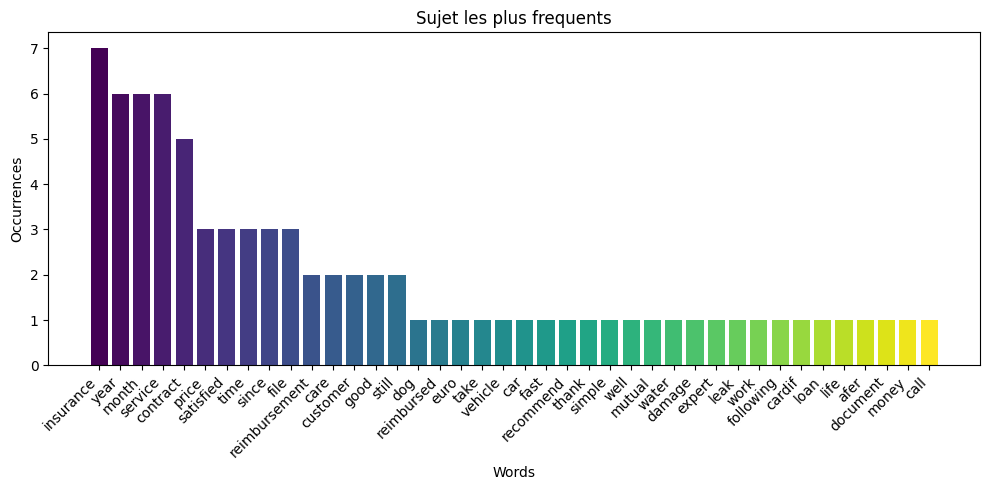

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


animaux=['insurance', 'year', 'contract', 'dog', 'month', 'reimbursement', 'reimbursed', 'euro', 'care', 'take']
auto=['insurance', 'price', 'service', 'satisfied', 'year', 'contract', 'vehicle', 'customer', 'car', 'good']
moto=['price', 'satisfied', 'service', 'fast', 'good', 'recommend', 'thank', 'simple', 'insurance', 'well']
sante=['mutual', 'service', 'reimbursement', 'month', 'contract', 'year', 'time', 'customer', 'insurance', 'since']
habitation=['water', 'damage', 'expert', 'leak', 'work', 'following', 'month', 'care', 'still', 'year']
credit=['insurance', 'file', 'service', 'month', 'cardif', 'loan', 'time', 'price', 'since', 'satisfied']
vie=['insurance', 'life', 'contract', 'month', 'year', 'afer', 'file', 'document', 'service', 'money']
prevoyance=['month', 'file', 'insurance', 'contract', 'year', 'since', 'service', 'time', 'still', 'call']
all_lists = animaux + auto + moto + sante + habitation + credit + vie+ prevoyance


word_counts = Counter(all_lists)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_word_counts)

colormap = plt.cm.get_cmap('viridis', len(words))

plt.figure(figsize=(10, 5))
ax = plt.gca()
bars = ax.bar(words, counts, color=[colormap(i) for i in np.linspace(0, 1, len(words))])

plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Sujet les plus frequents')
plt.xticks(rotation=45, fontsize=10, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
unique_words = [word for word, count in word_counts.items() if count < 2]

for i in range(len(produits)):
  print(f"Mots uniques dans {produits[i]}:", [word[0] for word in topics0[i] if word[0] in unique_words])

Mots uniques dans animaux: ['dog', 'reimbursed', 'euro', 'take']
Mots uniques dans auto: ['vehicle', 'car']
Mots uniques dans moto: ['fast', 'recommend', 'thank', 'simple', 'well']
Mots uniques dans sante: ['mutual']
Mots uniques dans habitation: ['water', 'damage', 'expert', 'leak', 'work', 'following']
Mots uniques dans credit: ['cardif', 'loan']
Mots uniques dans vie: ['life', 'afer', 'document', 'money']
Mots uniques dans prevoyance: ['call']


## **6. Embeddings to Identify Similar Words**


### **6.1 Word2Vec Training + Glove**

##### On réduit le dataset a 100 lignes par assureur pour ne pas que ce soit trop long

In [ ]:
df_embd = df.groupby('assureur').head(100)
print(df_embd.shape)
df_embd.head(3)

(4491, 13)


note            auteur                                               avis  \
0   NaN  catalane66-77373  Assurance qui met les clients en difficultés. ...   
1   NaN  egletons19-49616  Bonjour\nAdhérent 3001628. Vous m'avez adressé...   
2   NaN         luc-71731  Je suis toujours en attente de mon complément ...   

    assureur     produit  type date_publication   date_exp  \
0  Intériale  prevoyance  test       2019-07-05 2019-07-01   
1  Intériale  prevoyance  test       2019-03-27 2019-03-01   
2  Intériale  prevoyance  test       2019-02-28 2019-02-01   

                                             avis_en  \
0  Insurance that puts customers in difficulty. S...   
1  Hello\nMember 3001628. You have sent me a medi...   
2  I am still waiting for my salary supplement fo...   

                                            avis_cor  \
0  Assurance qui met les clients en difficultés. ...   
1  Bonjour\nAdhérent 3001628. Vous m'avez adressé...   
2  Je suis toujours en attente de mon complément ...   

                                         avis_cor_en  \
0  Insurance that puts customers in difficulty. S...   
1  Hello\nMember 3001628. You have sent me a medi...   
2  I am still waiting for my salary supplement fo...   

                                     avis_process_en  \
0  insurance put customer difficulty several week...   
1  hello member sent medical control form returne...   
2  still waiting salary supplement january februa...   

                                     avis_process_fr  
0  assurance met client difficultés plusieurs sem...  
1  bonjour adhérent m'avez adressé formulaire con...  
2  toujours attente complément salaire mois janvi...

In [ ]:
fig = px.bar(df_embd, x='assureur', title='Répartition des assureurs dans notre dataframe de sample', labels={'assureur': 'Assureur', 'count': 'Nombre'})

fig.show()

 On entraîne un modèle Word2Vec sur l'ensemble du texte et ensuite on utilise t-SNE pour réduire les dimensions et visualiser les embeddings en 3D. On peut choisir l'assureur choisi pour la visualisation

In [ ]:
all_tokens = df_embd['avis_process_en'].tolist()
all_tokens_list = [token.split() for token in all_tokens]

word2vec_model = Word2Vec(sentences=all_tokens_list, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.wv.save_word2vec_format("word2vec.model")
# Créer un dictionnaire pour stocker les embeddings de chaque mot
word_embeddings = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

df_word2vec = pd.DataFrame(list(word_embeddings.items()), columns=['word', 'embedding'])
df_word2vec['assureur'] = df_embd['assureur']
df_word2vec.head(2)

word                                          embedding   assureur
0  insurance  [-0.2917985, 0.5049477, -0.3267943, -0.1389089...  Intériale
1       year  [-0.4502919, 0.55917555, -0.2999818, -0.182810...  Intériale

In [ ]:
df_word2vec.shape

(9726, 3)

Maintenant, glove avec le modèle "en_core_web_md" de spacy , qui inclut les embeddings de GloVe. GloVe étant très lent, nous ne le ferons que sur Generali.

In [ ]:
#!python -m spacy download en_core_web_md
# Load the spaCy model
nlp = spacy.load('en_core_web_md')

# Function to get GloVe embeddings for each word in a sentence
def get_glove_embeddings(sentence):
    tokens = nlp(sentence)
    embeddings = [{'word': token.text, 'embedding': token.vector.tolist()} for token in tokens if token.has_vector]
    return embeddings

2024-01-21 10:26:25.181615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 10:26:25.181801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 10:26:25.201182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 10:26:27.908471: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
dfs = []
df_generali = df_embd[df_embd['assureur'] == 'Generali']
print(df_generali.shape)
for idx, row in tqdm(df_generali.iterrows(), total=df_generali.shape[0], desc='Processing Rows'):
    avis_process_en = row['avis_process_en']
    embeddings = get_glove_embeddings(avis_process_en)

    if embeddings:
        df_word_glove = pd.DataFrame(embeddings)
        df_word_glove['assureur'] = row['assureur']
        dfs.append(df_word_glove)

df_word_glove = pd.concat(dfs, ignore_index=True)
df_word_glove['assureur'] = df_embd['assureur']
df_word_glove.head(5)

(100, 13)


Processing Rows: 100%|██████████| 100/100 [00:12<00:00,  8.25it/s]


word                                          embedding   assureur
0       father  [-1.010599970817566, -2.4196999073028564, -3.7...  Intériale
1         died  [-5.772900104522705, -3.5380001068115234, -5.1...  Intériale
2         week  [4.700900077819824, -1.1818000078201294, 1.435...  Intériale
3          ago  [-5.159299850463867, -5.434500217437744, -7.92...  Intériale
4  immediately  [-1.480299949645996, 1.259600043296814, -0.016...  Intériale

In [ ]:
df_word_glove.shape

(3301, 3)

### **6.2 Visualization of embeddings with Matplotlib and Tensorboard**

In [ ]:
def visualize_embeddings_3d(df, assureur,model):
    df_assureur = df[df['assureur'] == assureur]
    tsne = TSNE(n_components=3, random_state=42, perplexity=5)
    embeddings_3d = tsne.fit_transform(np.array(df_assureur['embedding'].tolist()))
    df_assureur['X'] = embeddings_3d[:, 0]
    df_assureur['Y'] = embeddings_3d[:, 1]
    df_assureur['Z'] = embeddings_3d[:, 2]

    fig = px.scatter_3d(df_assureur, x='X', y='Y', z='Z', text='word', title=f'{model} Embeddings on words for {assureur} with t-SNE 3D')
    fig.show()

In [ ]:
visualize_embeddings_3d(df_word2vec,"Generali","Word2Vec")

<ipython-input-13-f41b8c1773b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assureur['X'] = embeddings_3d[:, 0]
<ipython-input-13-f41b8c1773b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assureur['Y'] = embeddings_3d[:, 1]
<ipython-input-13-f41b8c1773b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
visualize_embeddings_3d(df_word_glove,"Generali","GloVe")

<ipython-input-27-f41b8c1773b6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-f41b8c1773b6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-f41b8c1773b6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
current_directory = os.getcwd()
files_in_directory = os.listdir(current_directory)
print("Current Directory:", current_directory)
print("Files in Current Directory:", files_in_directory)
!python -m gensim.scripts.word2vec2tensor -i ./word2vec.model -o /content/my_model
files.download("/content/my_model_tensor.tsv")
files.download("/content/my_model_metadata.tsv")

Current Directory: /content
Files in Current Directory: ['.config', 'dossiers', 'word2vec.model', 'sample_data']
2024-01-20 15:25:37,266 - word2vec2tensor - INFO - running /usr/local/lib/python3.10/dist-packages/gensim/scripts/word2vec2tensor.py -i ./word2vec.model -o /content/my_model
2024-01-20 15:25:37,266 - keyedvectors - INFO - loading projection weights from ./word2vec.model
2024-01-20 15:25:39,749 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (9726, 100) matrix of type float32 from ./word2vec.model', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-20T15:25:39.746945', 'gensim': '4.3.2', 'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]', 'platform': 'Linux-6.1.58+-x86_64-with-glibc2.35', 'event': 'load_word2vec_format'}
2024-01-20 15:25:40,484 - word2vec2tensor - INFO - 2D tensor file saved to /content/my_model_tensor.tsv
2024-01-20 15:25:40,484 - word2vec2tensor - INFO - Tensor metadata file saved to /content/my_model_metadata.tsv
2024-01-2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 -> Launch https://projector.tensorflow.org/    
2 -> Load tensor and meta data downloaded local

Word2Vec emebddings with UMAP on Tensorboard :   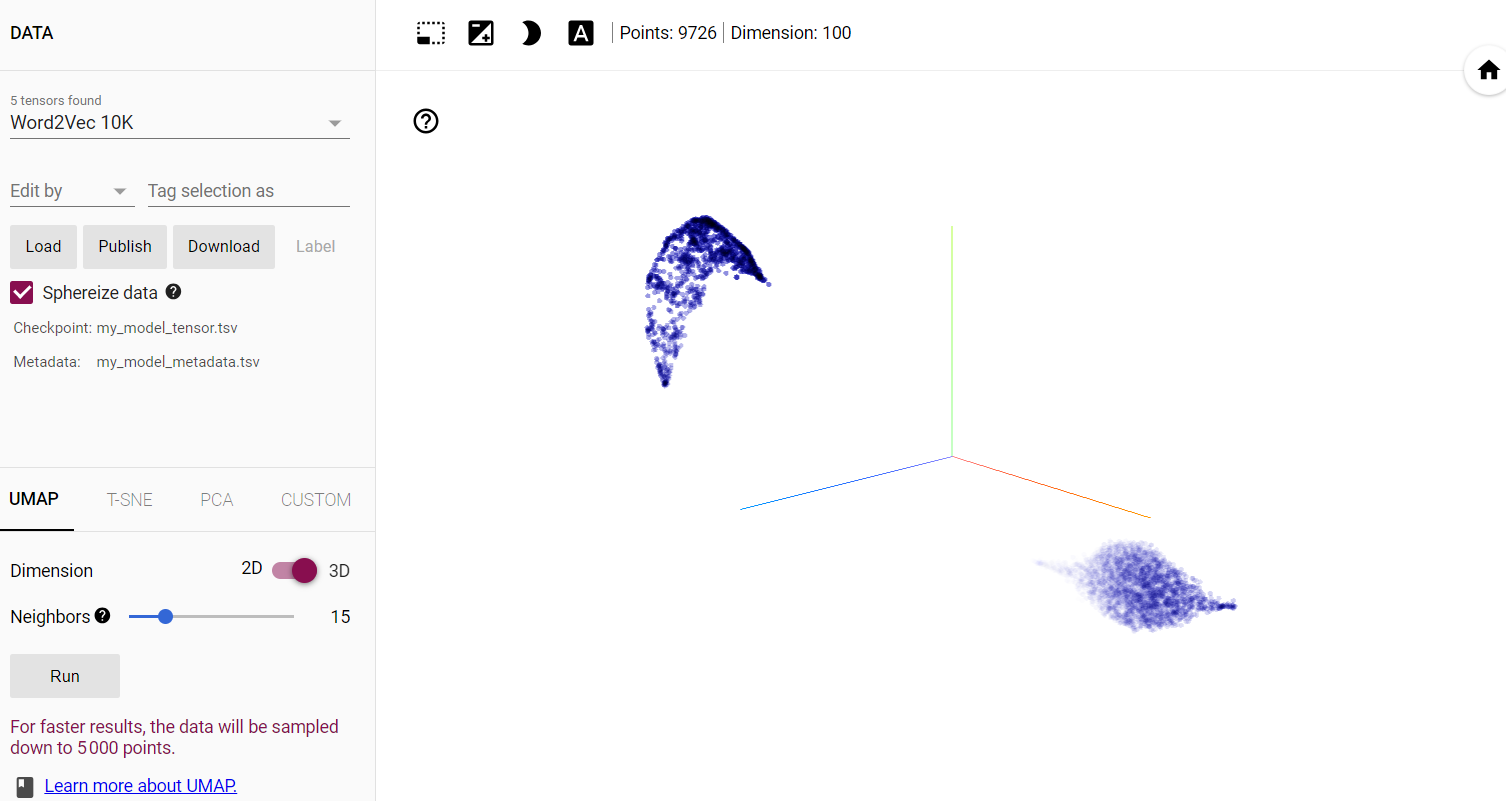

With the possiblity to search semantically words :
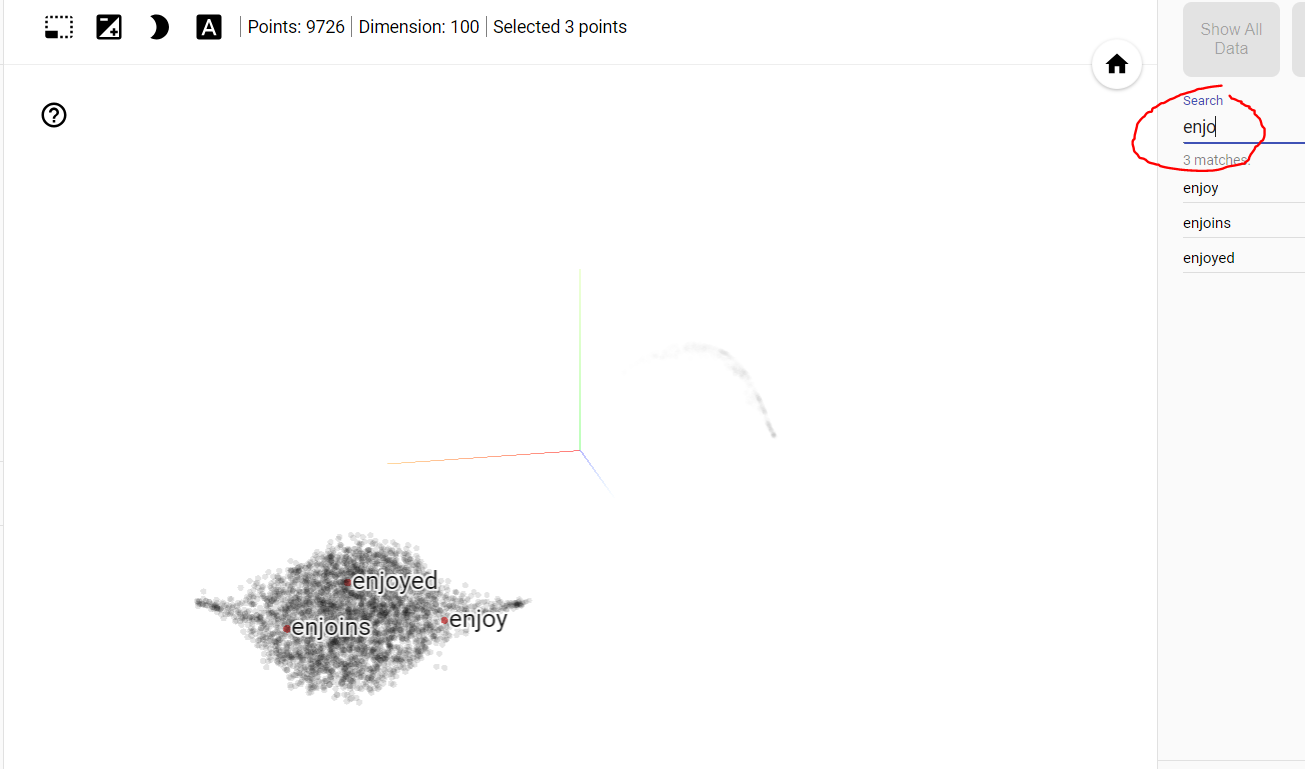

### **6.3 : Cosine distance**
Embeddings on reviews

Nous allons effectuer une recherche sémantique sur les embeddings word2vec, mais cette fois sans TSNE, afin d'avoir une représentation différente.

Notre but est de taper un mot spécifique, et de tracer en 3D les embeddings et les 5 premiers mots les plus similaires.

In [ ]:
df_word2vec.head()

word                                          embedding   assureur
0  insurance  [-0.2917985, 0.5049477, -0.3267943, -0.1389089...  Intériale
1       year  [-0.4502919, 0.55917555, -0.2999818, -0.182810...  Intériale
2   contract  [-0.4075843, 0.52421373, -0.1884555, -0.197886...  Intériale
3      month  [-0.5218416, 0.53112864, 0.17130531, -0.275438...  Intériale
4    service  [-0.5553637, 0.22779636, 0.039750375, -0.28233...  Intériale

Mot : insurance, Score : 0.9999999403953552
Mot : mutual, Score : 0.9897371530532837
Mot : home, Score : 0.9873225092887878
Mot : company, Score : 0.9852068424224854
Mot : increase, Score : 0.9837861061096191


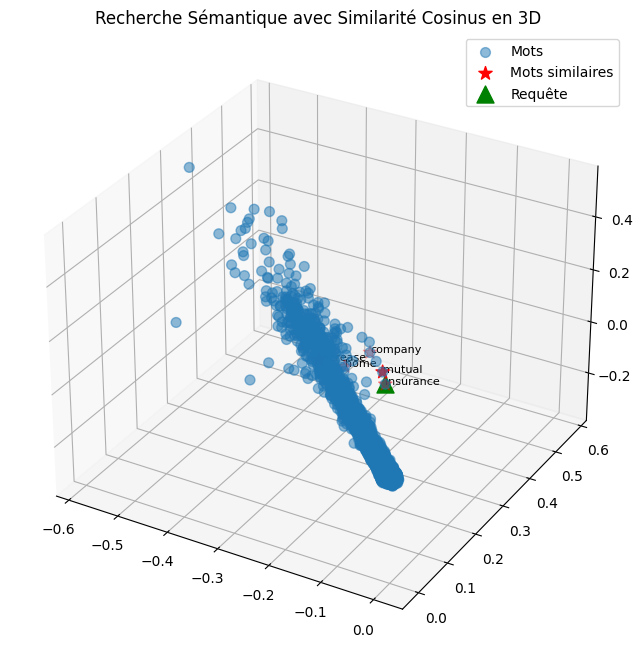

In [ ]:
def semantic_search(query_embedding, embeddings_matrix, df_word2vec, top_k=5):
    query_embedding = np.array(query_embedding)
    similarities = cosine_similarity([query_embedding], embeddings_matrix)
    indices = similarities.argsort()[0][::-1][:top_k]
    similar_words_embeddings = embeddings_matrix[indices]
    similar_words = df_word2vec.iloc[indices]['word'].tolist()
    for word, score in zip(similar_words, similarities[0][indices]):
        print(f"Mot : {word}, Score : {score}")
    return similar_words, similar_words_embeddings

query = 'insurance'
query_embedding = df_word2vec[df_word2vec['word'] == query]['embedding'].values[0]
embeddings_matrix = np.array(df_word2vec['embedding'].to_list())

#semantic search
similar_words, similar_words_embeddings = semantic_search(query_embedding, embeddings_matrix, df_word2vec)

# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# add words
ax.scatter(embeddings_matrix[:, 0], embeddings_matrix[:, 1], embeddings_matrix[:, 2], marker='o', s=50, alpha=0.5, label='Mots')
ax.scatter(similar_words_embeddings[:, 0], similar_words_embeddings[:, 1], similar_words_embeddings[:, 2], marker='*', s=100, c='red', label='Mots similaires')

for word, emb in zip(similar_words, similar_words_embeddings):
    ax.text(emb[0], emb[1], emb[2], word, size=8)

# Add request
ax.scatter(query_embedding[0], query_embedding[1], query_embedding[2], marker='^', s=150, c='green', label='Requête')
ax.legend()
plt.title('Recherche Sémantique avec Similarité Cosinus en 3D')
plt.show()


##### On peut voir le top 5 des mots les plus proches avec notre query "insurance", qui sont :
Mot : insurance, Score : 0.9999999403953552
Mot : mutual, Score : 0.9897371530532837
Mot : home, Score : 0.9873225092887878
Mot : company, Score : 0.9852068424224854
Mot : increase, Score : 0.9837861061096191

### **6.4 : Question Answering with semantic search.**

***Pour cette partie, au lieu d'avoir des embeddings pour les mots, nous avons pris le dataframe réduit pour les 100 premières critiques en général, et nous avons généré des embeddings pour chaque critique avec un modèle pré-entraîné "all-MiniLM-L6-v2" à partir de hugging face.***

Ensuite, nous posons une question et nous calculons la réponse la plus similaire (revue similaire).

Nous Avons utilisé un modèle de QA dans l'app. Voir app.py

In [ ]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def generate_embedding(text):
    return model.encode(text)

df_QA = pd.DataFrame(columns=['avis_en', 'avis_process_en', 'embedding'])

for index, row in tqdm(df_generali.iterrows(), total=len(df_generali)):
    avis_en = row['avis_en']
    avis_process_en = row['avis_process_en']
    embedding = generate_embedding(avis_process_en)
    df_QA = df_QA.append({'avis_en': avis_en, 'avis_process_en': avis_process_en, 'embedding': embedding}, ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-41-4b5705c62f83>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  1%|          | 1/100 [00:00<00:15,  6.53it/s]<ipython-input-41-4b5705c62f83>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-4b5705c62f83>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  3%|▎         | 3/100 [00:00<00:08, 11.29it/s]<ipython-input-41-4b5705c62f83>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-4b5705c62f83>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

  5%|▌      

In [ ]:
df_QA.head(3)

avis_en  \
0  My father died 4 weeks ago (05/05/2021), we im...   
1  I opened a general life protection contract. I...   
2  In case of conflicts it works service of the a...   

                                     avis_process_en  \
0  father died week ago immediately warned insure...   
1  opened general life protection contract view s...   
2  case conflict work service assurance insurance...   

                                           embedding  
0  [-0.38344634, 0.29173043, 0.0046724505, -0.063...  
1  [-0.5199887, 0.23300038, -0.03205548, -0.21843...  
2  [-0.53974533, -0.05201935, -0.29816607, -0.124...

In [ ]:
def question_answering(question, embeddings_matrix, df_embeddings, top_k=5):
    question_embedding = generate_embedding(question)
    similar_reviews, similar_reviews_embeddings = semantic_search2(question_embedding, embeddings_matrix, df_embeddings, top_k)
    similarity_scores = cosine_similarity([question_embedding], similar_reviews_embeddings)[0]

    # Sélectionner l'avis avec la similarité cosinus maximale
    best_review_index = np.argmax(similarity_scores)
    best_review = similar_reviews[best_review_index]

    # Score de confiance basé sur la similarité cosinus maximale
    confidence_score = similarity_scores[best_review_index]
    return best_review, confidence_score

def semantic_search2(query_embedding, embeddings_matrix, df_embeddings, top_k=5):
    query_embedding = np.array(query_embedding)
    similarities = cosine_similarity([query_embedding], embeddings_matrix)
    indices = similarities.argsort()[0][::-1][:top_k]
    similar_reviews_embeddings = np.array(embeddings_matrix)[indices]
    similar_reviews = df_embeddings.iloc[indices]['avis_en'].tolist()

    return similar_reviews, similar_reviews_embeddings

question = "Did your father death impact the insurance ? "
best_review, confidence_score = question_answering(question, df_QA['embedding'].to_list(), df_QA)
print(f"Meilleur avis : {best_review}, Score de confiance : {confidence_score}")

Meilleur avis : I am not happy because my dad had life insurance at Generali and during his death impossible to recover this one by providing all the papers. And I can't have anyone from home. I think you are doing this to recover the insurances so as not to have to reimburse them., Score de confiance : 0.5868854522705078


## **7. Supervised Learning, each model well-made and well-presented**

In [ ]:
from google.colab import drive
drive.mount('/content/dossiers/')

df = pd.read_csv('/content/dossiers/MyDrive/avis_process.csv')
df.dropna(subset=['avis_process_en'], inplace=True)
train_df = df[df["type"]=="train"]
test_df  = df[df["type"]=="test"]

Drive already mounted at /content/dossiers/; to attempt to forcibly remount, call drive.mount("/content/dossiers/", force_remount=True).


## **7.1 TF-IDF and classical ML**

In [ ]:
def train_tfidf_model(reviews):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_embeddings = tfidf_vectorizer.fit_transform(reviews)
    return tfidf_embeddings.toarray(), tfidf_vectorizer

def tsneVizDoc(embeddings, method, label, perplexity=30):
    tsne = TSNE(n_components=3, random_state=42, perplexity=perplexity)
    embeddings_tsne = tsne.fit_transform(embeddings)
    df = pd.DataFrame(embeddings_tsne, columns=['Dim1', 'Dim2', 'Dim3'])
    df['label'] = label
    fig = px.scatter_3d(df, x='Dim1', y='Dim2', z='Dim3', color='label',
                    title=f"{method} Embeddings - 3D t-SNE Visualization with Clusters")
    fig.update_traces(marker=dict(size=5))
    fig.show()

In [ ]:
i=2000
embeddings,model = train_tfidf_model(train_df["avis_process_en"].iloc[0:i])
print(np.shape(embeddings))
label = list(train_df["note"].values)[0:i]
tsneVizDoc(embeddings,"TFIDF",label)

(2000, 5549)


**a - Prediction de la note sans tenir compte des autres features**

In [ ]:
import random
random.seed(10)

In [ ]:
#split
from sklearn.utils import shuffle
train_df = shuffle(train_df)
X1 = train_df["avis_process_en"]
y1 = train_df["note"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
#vectorisation
tfidf_vectorizer = TfidfVectorizer()
X_train1 = tfidf_vectorizer.fit_transform(X_train1).toarray()
X_test1  = tfidf_vectorizer.transform(X_test1).toarray()

#Random forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train1, y_train1)

#Prediction
y_pred1 = random_forest_classifier.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
report1 = classification_report(y_test1, y_pred1)
print("Accuracy:", accuracy1)
print("Classification Report:\n", report1)


Accuracy: 0.5069838196653298
Classification Report:
               precision    recall  f1-score   support

         1.0       0.54      0.95      0.69      2220
         2.0       0.50      0.02      0.03      1129
         3.0       0.38      0.05      0.08       983
         4.0       0.43      0.42      0.42      1459
         5.0       0.51      0.61      0.55      1440

    accuracy                           0.51      7231
   macro avg       0.47      0.41      0.36      7231
weighted avg       0.48      0.51      0.42      7231



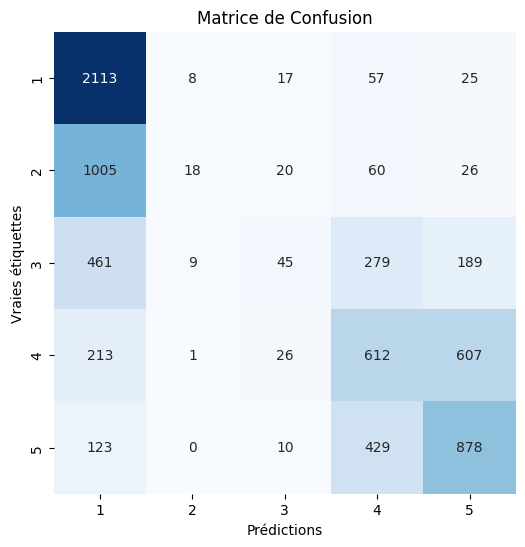

In [ ]:
confusion1 = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion1, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["1", "2", "3", "4", "5"], yticklabels=["1", "2", "3", "4", "5"])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

Tendance a Surevaluer la classe 1 d'ou les bonnes performances sur cette classe, de meme pour la classe 5

**b - Prediction dans la note en integrant le type de produit et l'assureur**

In [ ]:
#Select comments features and other features
y = train_df["note"]
#y = pd.get_dummies(y, columns=['note'], prefix=['note'])

X = train_df["avis_process_en"]
produits = pd.get_dummies(train_df, columns=['produit'], prefix=['produit'])
assureur = pd.get_dummies(train_df, columns=['assureur'], prefix=['assureur'])
produits.drop(columns=['note', 'auteur', 'avis', 'assureur', 'type', 'date_publication',
                       'date_exp', 'avis_en', 'avis_cor', 'avis_cor_en', 'avis_process_en',
                       'avis_process_fr'],inplace=True)
assureur.drop(columns=['note', 'auteur', 'avis', 'produit', 'type', 'date_publication',
                       'date_exp', 'avis_en', 'avis_cor', 'avis_cor_en', 'avis_process_en',
                       'avis_process_fr'],inplace=True)
other = pd.concat([assureur, produits], axis=1)

#train test split
X_train, X_test, y_train, y_test, o_train, o_test = train_test_split(X, y, other, test_size=0.3, random_state=42)

In [ ]:
#vectorisation
tfidf_vectorizer = TfidfVectorizer()
X_train2 = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test2  = tfidf_vectorizer.transform(X_test).toarray()

X_train2 = np.concatenate((np.array(X_train2), np.array(o_train)), axis=1)
X_test2 = np.concatenate((np.array(X_test2), np.array(o_test)), axis=1)

print("features shape :", np.shape(X_train2))
print("target shape :", np.shape(y_train))

features shape : (16872, 15482)
target shape : (16872,)


In [ ]:
#Random forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train2, y_train)

#Prediction
y_pred2 = random_forest_classifier.predict(X_test2)
accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2)
print("Accuracy:", accuracy2)
print("Classification Report:\n", report2)

Accuracy: 0.5050477112432582
Classification Report:
               precision    recall  f1-score   support

         1.0       0.55      0.94      0.70      2220
         2.0       0.24      0.01      0.02      1129
         3.0       0.28      0.06      0.10       983
         4.0       0.42      0.42      0.42      1459
         5.0       0.51      0.61      0.56      1440

    accuracy                           0.51      7231
   macro avg       0.40      0.41      0.36      7231
weighted avg       0.43      0.51      0.43      7231



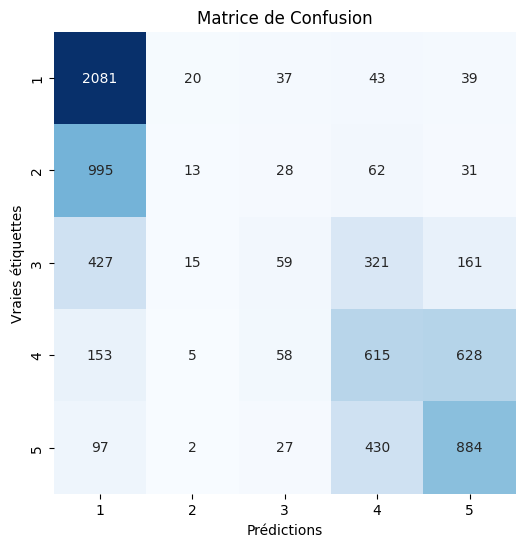

In [ ]:
confusion2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion2, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["1", "2", "3", "4", "5"], yticklabels=["1", "2", "3", "4", "5"])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
#!pip install joblib
import joblib
#!pip install joblib==0.14.1

filename = 'random_forest_classifier_model.sav'
joblib.dump(random_forest_classifier, filename)
rf = joblib.load(filename)


joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

PLus equilibré

### **7.3 - Model with pre-trained embeddings**

In [ ]:
def train_fasttext_model(reviews, dim=200, epoch=5):
    model = FastText(sentences=reviews) #epochs=epoch#vector_size=dim,
    return model

def fasttext_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

def fastTextDoc(reviews,model=None):
    embeddings_list = []
    rev = [r.split(" ")[:] for r in reviews]
    if model is None:
      model = train_fasttext_model(rev)
    for r in rev:
      embeddings = fasttext_embedding(r, model)
      embeddings_list.append(embeddings)
    return np.array(embeddings_list), model

In [ ]:
i=2000
embeddings,model = fastTextDoc(train_df["avis_process_en"].iloc[0:i])
print(np.shape(embeddings))
label = list(train_df["note"].values)[0:i]
tsneVizDoc(embeddings,"fatstext",label)

In [ ]:
X_train3,model = fastTextDoc(X_train)
X_test3 ,model = fastTextDoc(X_test,model)

X_train3 = np.concatenate((np.array(X_train3), np.array(o_train)), axis=1)
X_test3  = np.concatenate((np.array(X_test3),  np.array(o_test)), axis=1)

print("features shape :", np.shape(X_train3))
print("target shape :", np.shape(y_train))

#Random forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train3, y_train)

#Prediction
y_pred3 = random_forest_classifier.predict(X_test3)
accuracy3 = accuracy_score(y_test, y_pred3)
report3 = classification_report(y_test, y_pred3)
print("Accuracy:", accuracy3)
print("Classification Report:\n", report3)

features shape : (16872, 169)
target shape : (16872,)
Accuracy: 0.48679297469229704
Classification Report:
               precision    recall  f1-score   support

         1.0       0.57      0.86      0.69      2220
         2.0       0.30      0.09      0.14      1129
         3.0       0.28      0.11      0.16       983
         4.0       0.39      0.43      0.41      1459
         5.0       0.49      0.53      0.51      1440

    accuracy                           0.49      7231
   macro avg       0.41      0.41      0.38      7231
weighted avg       0.44      0.49      0.44      7231



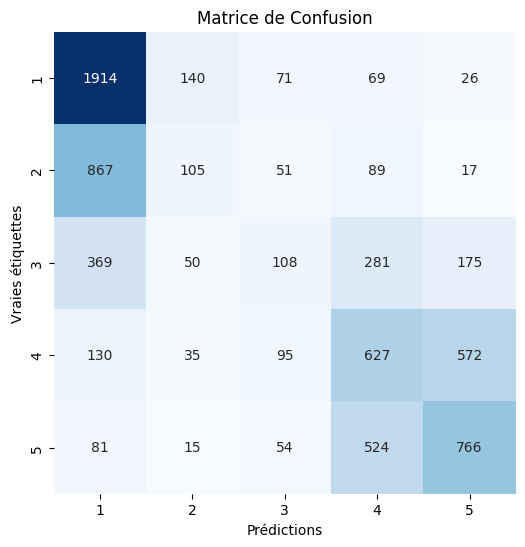

In [ ]:
confusion3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion3, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["1", "2", "3", "4", "5"], yticklabels=["1", "2", "3", "4", "5"])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

### **7.4 USE (Universal Sentence Embedding) or equivalents, RNN LSTM, CNN, BERT, or other models on Hugging Face**

In [ ]:
# Load tokenizer and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu");
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-mini");

# Update num_labels to match the number of classes in your dataset
num_classes = 5
model = BertForSequenceClassification.from_pretrained("prajjwal1/bert-mini", num_labels=num_classes);
model.to(device);

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-mini and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Hyperparameters
batch_size = 32
num_epochs = 3
print("Hyperparameters set")

# Tokenize and create DataLoader for training data
train_df = pd.get_dummies(train_df, columns=['note'], prefix=['note'])
dfU = train_df.sample(frac=1).iloc[0:]

encodings  = tokenizer(list(dfU['avis_process_en']), truncation=True, padding=True, max_length=128)
dataset    = TensorDataset(torch.tensor(encodings['input_ids']), torch.tensor(encodings['attention_mask']), torch.tensor(dfU[["note_1.0","note_2.0","note_3.0","note_4.0","note_5.0"]].values))
print("Data prepared and tokenized")

# Splitting data into training and testing
id_train, id_test, att_train, att_test, y_train, y_test = train_test_split(
    dataset.tensors[0], dataset.tensors[1], dataset.tensors[2],
    test_size=0.3,
    random_state=42)

# Prepare train dataloader
train_data = TensorDataset(id_train, att_train, y_train.long())
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Prepare test dataloader
test_data = TensorDataset(id_test, att_test, y_test.long())
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

print("data splitted")

Hyperparameters set
Data prepared and tokenized
data splitted


In [ ]:
# Change to CrossEntropyLoss for classification and AdamW which is working well on Sbert
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training
loss_evol =[]
for epoch in range(num_epochs):
  print("epoch ",epoch+1,"/3 ",end="")
  model.train()
  total_loss = 0

  for batch in train_dataloader:
    print("-",end="")
    inputs, masks, labels = [b.to(device) for b in batch]
    optimizer.zero_grad()

    outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    loss = criterion(logits, labels.float())
    total_loss += loss.item()

    loss.backward()
    optimizer.step()

  avg_train_loss = total_loss / len(train_dataloader)
  print()
  print(f"Epoch {epoch+1}/{num_epochs}, Average training loss: {avg_train_loss}")
  loss_evol.append(avg_train_loss)
  print()


epoch  0  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/3, Average training loss: 1.3139710978350856

epoch  1  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluation
model.eval()
total_eval_accuracy = 0

pred = []
for batch in test_dataloader:
    inputs, masks, labels = [b.to(device) for b in batch]
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()

    # Convert logits to class predictions
    predictions = np.argmax(logits, axis=1)
    pred.extend(predictions)

    # Convert one-hot encoded labels back to class indices for comparison
    true_classes = np.argmax(label_ids, axis=1)

    # Calculate accuracy
    total_eval_accuracy += accuracy_score(true_classes, predictions)

avg_test_accuracy = total_eval_accuracy / len(test_dataloader)
print(f"Accuracy on test set: {avg_test_accuracy}")

Accuracy on test set: 0.4964717741935484


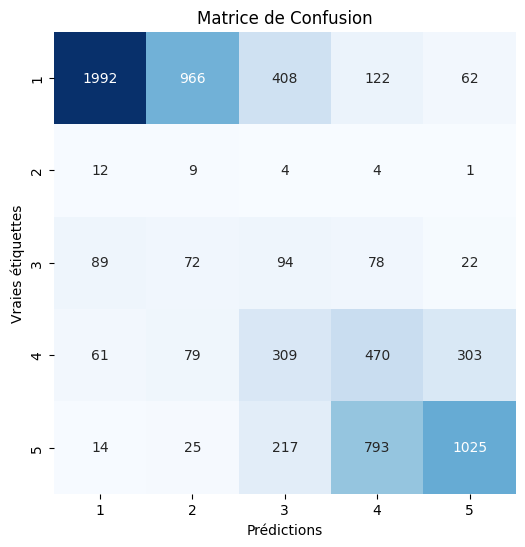

In [ ]:
confusion3 = confusion_matrix(pred, np.argmax(y_test,axis=1).toarray())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion3, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["1", "2", "3", "4", "5"], yticklabels=["1", "2", "3", "4", "5"])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
# Save the model state
torch.save(model.state_dict(), "/content/dossiers/MyDrive/bert_state_notes");


model = BertForSequenceClassification.from_pretrained('prajjwal1/bert-mini', num_labels=5);
model.load_state_dict(torch.load("/content/dossiers/MyDrive/bert_state_notes"));
model.to(device);

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Save test for futur analysis
torch.save(id_test, '/content/dossiers/MyDrive/id_test.pt')
torch.save(att_test, '/content/dossiers/MyDrive/att_test.pt')
torch.save(y_test, '/content/dossiers/MyDrive/y_test.pt')

# Load
id_test1 = torch.load('/content/dossiers/MyDrive/id_test.pt')
att_test1 = torch.load('/content/dossiers/MyDrive/att_test.pt')
y_test1 = torch.load('/content/dossiers/MyDrive/y_test.pt')

# test dataloaed DataLoader
loaded_test = TensorDataset(id_test1, att_test1, y_test1)
test_dataloader = DataLoader(loaded_test, batch_size=batch_size, shuffle=False)


### APP on app.py

___